# Jupiter notebook for the fourth seminar

## Support Vector Machine (SVM)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
%matplotlib inline

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_circles, make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

This fit_and_plot function will make pictures of the results:

In [43]:
def fit_and_plot(X, y, model, Nx=200, Ny=200):
  # Splitting the dataset and fitting on the train part
  X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

  model.fit(X_train, y_train)

  # Plotting the `|margin| < 1` band
  grid_x0 = np.linspace(X[:,0].min() - 0.5, X[:,0].max() + 0.5, Nx)
  grid_x1 = np.linspace(X[:,1].min() - 0.5, X[:,1].max() + 0.5, Ny)

  xx0, xx1 = np.meshgrid(grid_x0, grid_x1)
  zz = model.decision_function(
      np.c_[xx0.ravel(), xx1.ravel()]
  ).reshape(xx0.shape)

  plt.contourf(xx0, xx1, zz, cmap=plt.cm.RdBu, alpha=.8, linestyles=['--', '-', '--'], levels=[-1, 0, 1])
  plt.contour(xx0, xx1, zz, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

  # Highlighting support vectors
  if hasattr(model, "named_steps"):
    sv = model[:-1].inverse_transform(
        model.named_steps['svc'].support_vectors_
    )
  else:
    sv = model.support_vectors_
  plt.scatter(*sv.T, s=180, facecolors='none', zorder=10, edgecolors='black', linewidths=0.5)

  # Plotting the data points
  plt.scatter(*X_train.T, c=y_train, cmap=cm_bright, alpha=0.3, s=36)
  plt.scatter(*X_test.T, c=y_test, cmap=cm_bright, alpha=0.8, s=36, marker='<')

  # Tweaking the plot a bit
  plt.xlim(xx0.min(), xx0.max())
  plt.ylim(xx1.min(), xx1.max())
  plt.xlabel("x0")
  plt.ylabel("x1")

Now we are creating datasets

In [44]:
datasets = []

# Linearly separable dataset:
datasets.append(
    make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=42)
)

# Linearly inseparable:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                               random_state=231, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 15 * rng.uniform(size=X.shape)
datasets.append((X, y))

# Circles:
datasets.append(make_circles(n_samples=100, noise=0.05, random_state=42))

Now we can see the result of fit and change parameters

In [45]:
# You can choose dataset 0, 1 or 2
numberOfDataset = 2
# You can choose the max degree of polynomial
degreeOfPolynomial = 2
# You can choose the constant C for penalties for slack variables
constantOfSVC = 100.

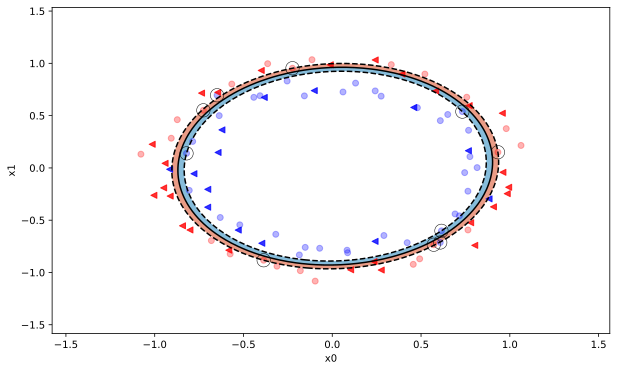

In [46]:
X, y = datasets[numberOfDataset]

poly_transformer = PolynomialFeatures(degree=degreeOfPolynomial,include_bias=False)
poly_transformer.inverse_transform = lambda X: X[:,:2]

model = make_pipeline(
    StandardScaler(),
    poly_transformer,
    SVC(C=constantOfSVC, kernel='linear')
)

plt.figure(figsize=(10, 6))
fit_and_plot(X, y, model)

Task 1: see the dependence of the number of support vectors from C

In [47]:
def numberOfSupportVectors(dset,CONST,degree):
    X, y = datasets[dset]

    poly_transformer = PolynomialFeatures(degree=degree,include_bias=False)
    poly_transformer.inverse_transform = lambda X: X[:,:2]

    answer = []
    for C in CONST:
        model = make_pipeline(
            StandardScaler(),
            poly_transformer,
            SVC(C=C, kernel='linear')
            )
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
        model.fit(X_train, y_train)
        
        if hasattr(model, "named_steps"):
            sv = model[:-1].inverse_transform(
                model.named_steps['svc'].support_vectors_
                )
        else:
            sv = model.support_vectors_
        answer.append(len(sv))
    return np.array(answer)

100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


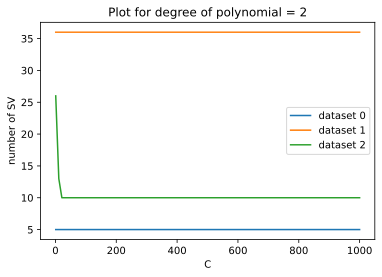

In [48]:
newDegreeOfPolynomial = 2
C = np.linspace(1.,1000.,100)
for i in trange(3):
    plt.plot(C,numberOfSupportVectors(i,C,newDegreeOfPolynomial),label=f'dataset {i}')
plt.legend()
plt.xlabel('C')
plt.ylabel('number of SV')
plt.title(f'Plot for degree of polynomial = {newDegreeOfPolynomial}')
plt.show()

Task 2: try different SVM kernels

In [49]:
# You can choose dataset 0, 1 or 2
numberOfDataset = 1
# You can choose kernel type 'linear', 'poly' or 'rbf'
kernelType = 'rbf'
# If you use 'poly' kernel, choose degree, other kernels ignore this
polyDegree = 2
# Choose gamma for 'rbf' of 'poly' kernel, can use float, 'scale' or 'auto'
userGamma = 0.1
# Choose coef0 for 'poly' kernel
r = 0
# And you can choose C of course
constantOfSVC = 1000.

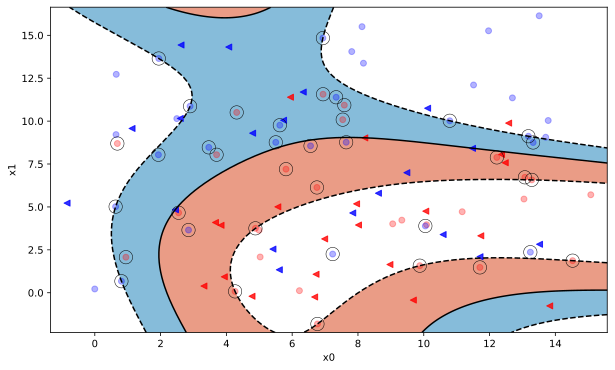

In [50]:
X, y = datasets[numberOfDataset]

model = make_pipeline(
    StandardScaler(),
    SVC(C=constantOfSVC, kernel=kernelType, degree=polyDegree, gamma=userGamma, coef0=r)
)

plt.figure(figsize=(10, 6))
fit_and_plot(X, y, model)

## Titanic data

Task 3: get the accuracy of at least 0.81 on the test set of Titanic data

In [51]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2021/raw/main/seminar01/train.csv

--2021-10-28 12:34:59--  https://github.com/HSE-LAMBDA/MLatFIAN2021/raw/main/seminar01/train.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2021/main/seminar01/train.csv [following]
--2021-10-28 12:34:59--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2021/main/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2021-10-28 12:34:59 (1.45 MB/s) - ‘train.csv.2’ saved [60302/60302]



In [52]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass","Sex","Age","SibSp","Parch","Fare"]].copy()
    for i in ["Pclass","Age","SibSp","Parch","Fare"]:
        features[i]=features[i].fillna(value=features[i].mean())
    features.loc[(features["Sex"]=="male"),"Sex"]=1
    features.loc[(features["Sex"]=="female"),"Sex"]=0
    return features

In [86]:
model = make_pipeline(
    RobustScaler(),
    PolynomialFeatures(degree=2,include_bias=False),
    LogisticRegression(C=0.1,max_iter=1000)
)

In [87]:
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy: {:.3f}".format(accuracy_score(
    data_train['Survived'],
    train_predictions
)))
print("Test accuracy: {:.3f}".format(accuracy_score(
    data_test['Survived'],
    test_predictions
)))

Train accuracy: 0.822
Test accuracy: 0.840
